In [1]:
#importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Dataframe').getOrCreate()

In [3]:
spark

In [4]:
## read the dataset
df=spark.read.csv('/content/drive/MyDrive/Colab Notebooks/pubg.csv',header=True,inferSchema=True)
df.show()
# inferSchema=True, If false every data will be considered as string

+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+
|            Id|       groupId|       matchId|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|
+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+
|7f96b2f878858a|4d4

In [5]:
### Check the schema
df.printSchema() #Like df.info()

root
 |-- Id: string (nullable = true)
 |-- groupId: string (nullable = true)
 |-- matchId: string (nullable = true)
 |-- assists: integer (nullable = true)
 |-- boosts: integer (nullable = true)
 |-- damageDealt: double (nullable = true)
 |-- DBNOs: integer (nullable = true)
 |-- headshotKills: integer (nullable = true)
 |-- heals: integer (nullable = true)
 |-- killPlace: integer (nullable = true)
 |-- killPoints: integer (nullable = true)
 |-- kills: integer (nullable = true)
 |-- killStreaks: integer (nullable = true)
 |-- longestKill: double (nullable = true)
 |-- matchDuration: integer (nullable = true)
 |-- matchType: string (nullable = true)
 |-- maxPlace: integer (nullable = true)
 |-- numGroups: integer (nullable = true)
 |-- rankPoints: integer (nullable = true)
 |-- revives: integer (nullable = true)
 |-- rideDistance: double (nullable = true)
 |-- roadKills: integer (nullable = true)
 |-- swimDistance: double (nullable = true)
 |-- teamKills: integer (nullable = true)
 |--

In [6]:
type(df)

pyspark.sql.dataframe.DataFrame

In [7]:
df.head(5)

[Row(Id='7f96b2f878858a', groupId='4d4b580de459be', matchId='a10357fd1a4a91', assists=0, boosts=0, damageDealt=0.0, DBNOs=0, headshotKills=0, heals=0, killPlace=60, killPoints=1241, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1306, matchType='squad-fpp', maxPlace=28, numGroups=26, rankPoints=-1, revives=0, rideDistance=0.0, roadKills=0, swimDistance=0.0, teamKills=0, vehicleDestroys=0, walkDistance=244.8, weaponsAcquired=1, winPoints=1466, winPlacePerc=0.4444),
 Row(Id='eef90569b9d03c', groupId='684d5656442f9e', matchId='aeb375fc57110c', assists=0, boosts=0, damageDealt=91.47, DBNOs=0, headshotKills=0, heals=0, killPlace=57, killPoints=0, kills=0, killStreaks=0, longestKill=0.0, matchDuration=1777, matchType='squad-fpp', maxPlace=26, numGroups=25, rankPoints=1484, revives=0, rideDistance=0.0045, roadKills=0, swimDistance=11.04, teamKills=0, vehicleDestroys=0, walkDistance=1434.0, weaponsAcquired=5, winPoints=0, winPlacePerc=0.64),
 Row(Id='1eaf90ac73de72', groupId='6a4a42c32

In [8]:
df.describe().show()

+-------+--------------+--------------+--------------+-------------------+------------------+------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+-----------------+------------------+---------+------------------+------------------+-----------------+-------------------+------------------+--------------------+-----------------+-------------------+-------------------+------------------+------------------+-----------------+-------------------+
|summary|            Id|       groupId|       matchId|            assists|            boosts|       damageDealt|             DBNOs|      headshotKills|             heals|         killPlace|        killPoints|             kills|       killStreaks|      longestKill|     matchDuration|matchType|          maxPlace|         numGroups|       rankPoints|            revives|      rideDistance|           roadKills|     swimDistance|          teamKills|    vehic

# **Exploratory Data** **Analysis**

# Sample the data
# Example: % sample, without replacement
fraction = 0.01
sampled_data = df.sample(withReplacement=False, fraction=fraction, seed=42)

# Convert to Pandas DataFrame
pandas_df = sampled_data.toPandas()

# Create the pairplot
sns.pairplot(pandas_df)
plt.show()

In [9]:
sample_data = df.sample(withReplacement=False, fraction=0.3, seed=42)
pandas_full = sample_data.toPandas()

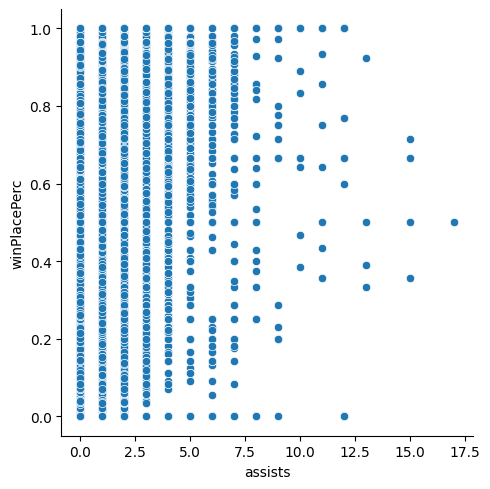

In [10]:
sns.relplot(x='assists',y='winPlacePerc',data=pandas_full)
# assists are showing trend for the winPlacePerc.

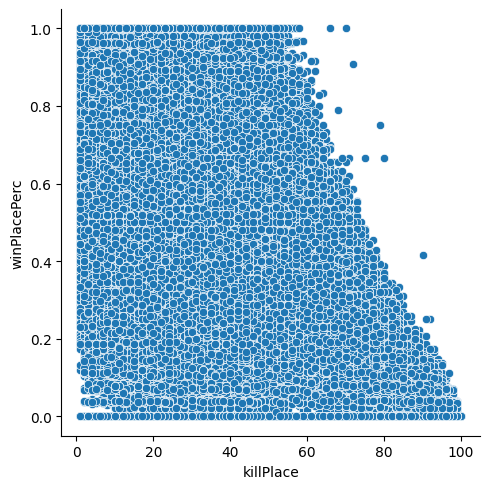

In [11]:
sns.relplot(x='killPlace',y='winPlacePerc',data=pandas_full)
# killPlace are showing trend for the winPlacePerc.

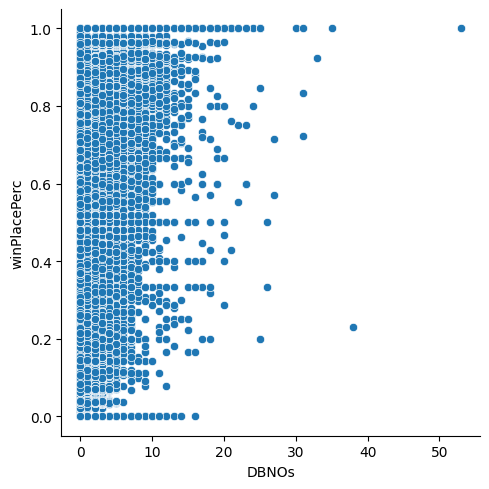

In [12]:
sns.relplot(x='DBNOs',y='winPlacePerc',data=pandas_full)
# killPlace are showing trend for the winPlacePerc.

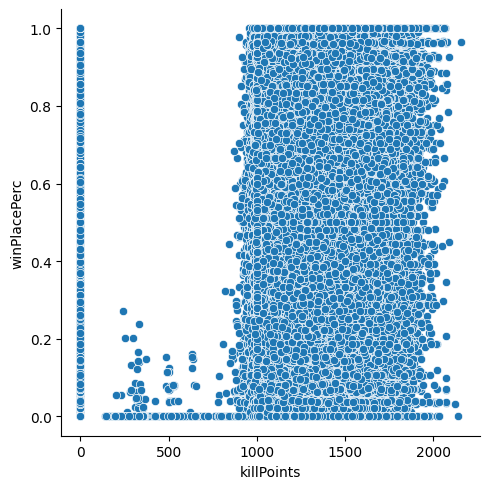

In [13]:
sns.relplot(x='killPoints',y='winPlacePerc',data=pandas_full)
# killPoints are showing trend for the winPlacePerc

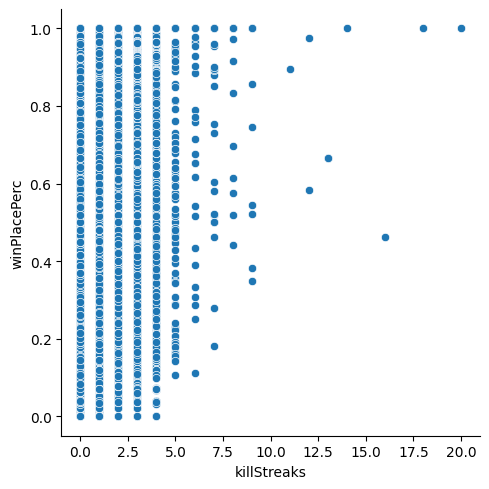

In [14]:
sns.relplot(x='killStreaks',y='winPlacePerc',data=pandas_full)
# killStreaks are showing trend for the winPlacePerc

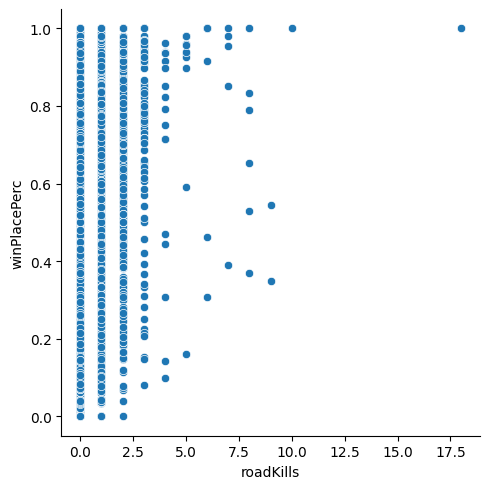

In [15]:
sns.relplot(x='roadKills',y='winPlacePerc',data=pandas_full)
# roadKills are showing trend for the winPlacePerc

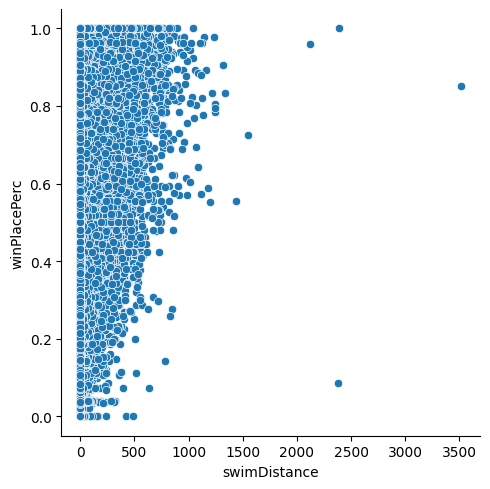

In [16]:
sns.relplot(x='swimDistance',y='winPlacePerc',data=pandas_full)
# swimDistance are showing trend for the winPlacePerc

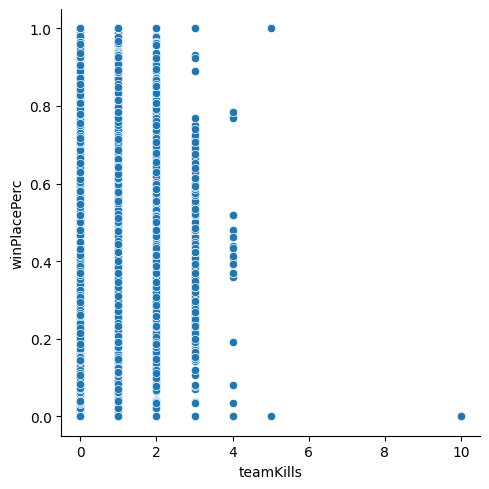

In [17]:
sns.relplot(x='teamKills',y='winPlacePerc',data=pandas_full)
# teamKills are not showing trend for the winPlacePerc

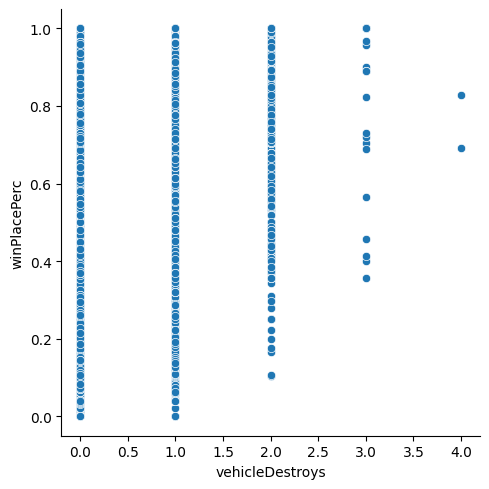

In [18]:
sns.relplot(x='vehicleDestroys',y='winPlacePerc',data=pandas_full)
# vehicleDestroys are not showing trend for the winPlacePerc

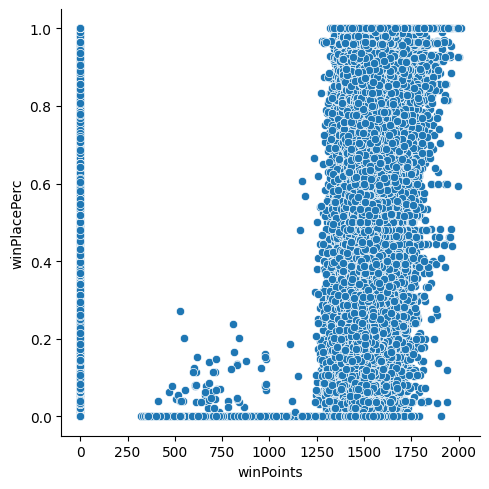

In [19]:
sns.relplot(x='winPoints',y='winPlacePerc',data=pandas_full)
# winPoints are not showing trend for the winPlacePerc

# **Data Pre-processing**

##  Checking for null values

In [20]:
from pyspark.sql.functions import count, when, col

# Get the column names from the DataFrame
columns_to_check = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType']

null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in columns_to_check])

# Show the results
null_counts.show()

+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+---------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+---------+
|      0|     0|          0|    0|            0|    0|        0|         0|    0|          0|          0|            0|       0|        0|         0|     

In [21]:
from pyspark.sql.functions import count, when, col

# Create a boolean column indicating if any column in a row is null
null_row_indicator = sum([when(col(c).isNull(), 1).otherwise(0) for c in df.columns]) > 0

# Count the number of rows where the null_row_indicator is True
null_row_count = df.filter(null_row_indicator).count()
print(null_row_count)

1


In [22]:
df = df.dropna()

In [23]:
null_counts = df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns])

# Show the results
null_counts.show() #Droping null values as its just one row.

+---+-------+-------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+
| Id|groupId|matchId|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|
+---+-------+-------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+
|  0|      0|      0|      0|     0|          0|    0|            0|    0|        0|         0

## Handling Categorical Value

In [24]:
from pyspark.ml.feature import StringIndexer
indexer=StringIndexer(inputCol="matchType",outputCol="matchType_")
df=indexer.fit(df).transform(df)
df.show()

+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|            Id|       groupId|       matchId|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|matchType|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+--------------+--------------+--------------+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+---------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+-----------

In [25]:
df=df.drop('Id','groupId','matchId','matchType') #Dropping these 'Id','groupId','matchId' columns as they are not required for predection and match type as we have indexed it with new column.

In [26]:
df.show() #All the categorical data has been handled.

+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|      0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|      28|       26|        -1|  

# Handling Outliers

In [27]:
samplee_data = df.sample(withReplacement=False, fraction=0.3, seed=42)
pandas_updated = samplee_data.toPandas()

In [28]:
column_names = pandas_updated.columns.tolist()
print(column_names)

['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType_']


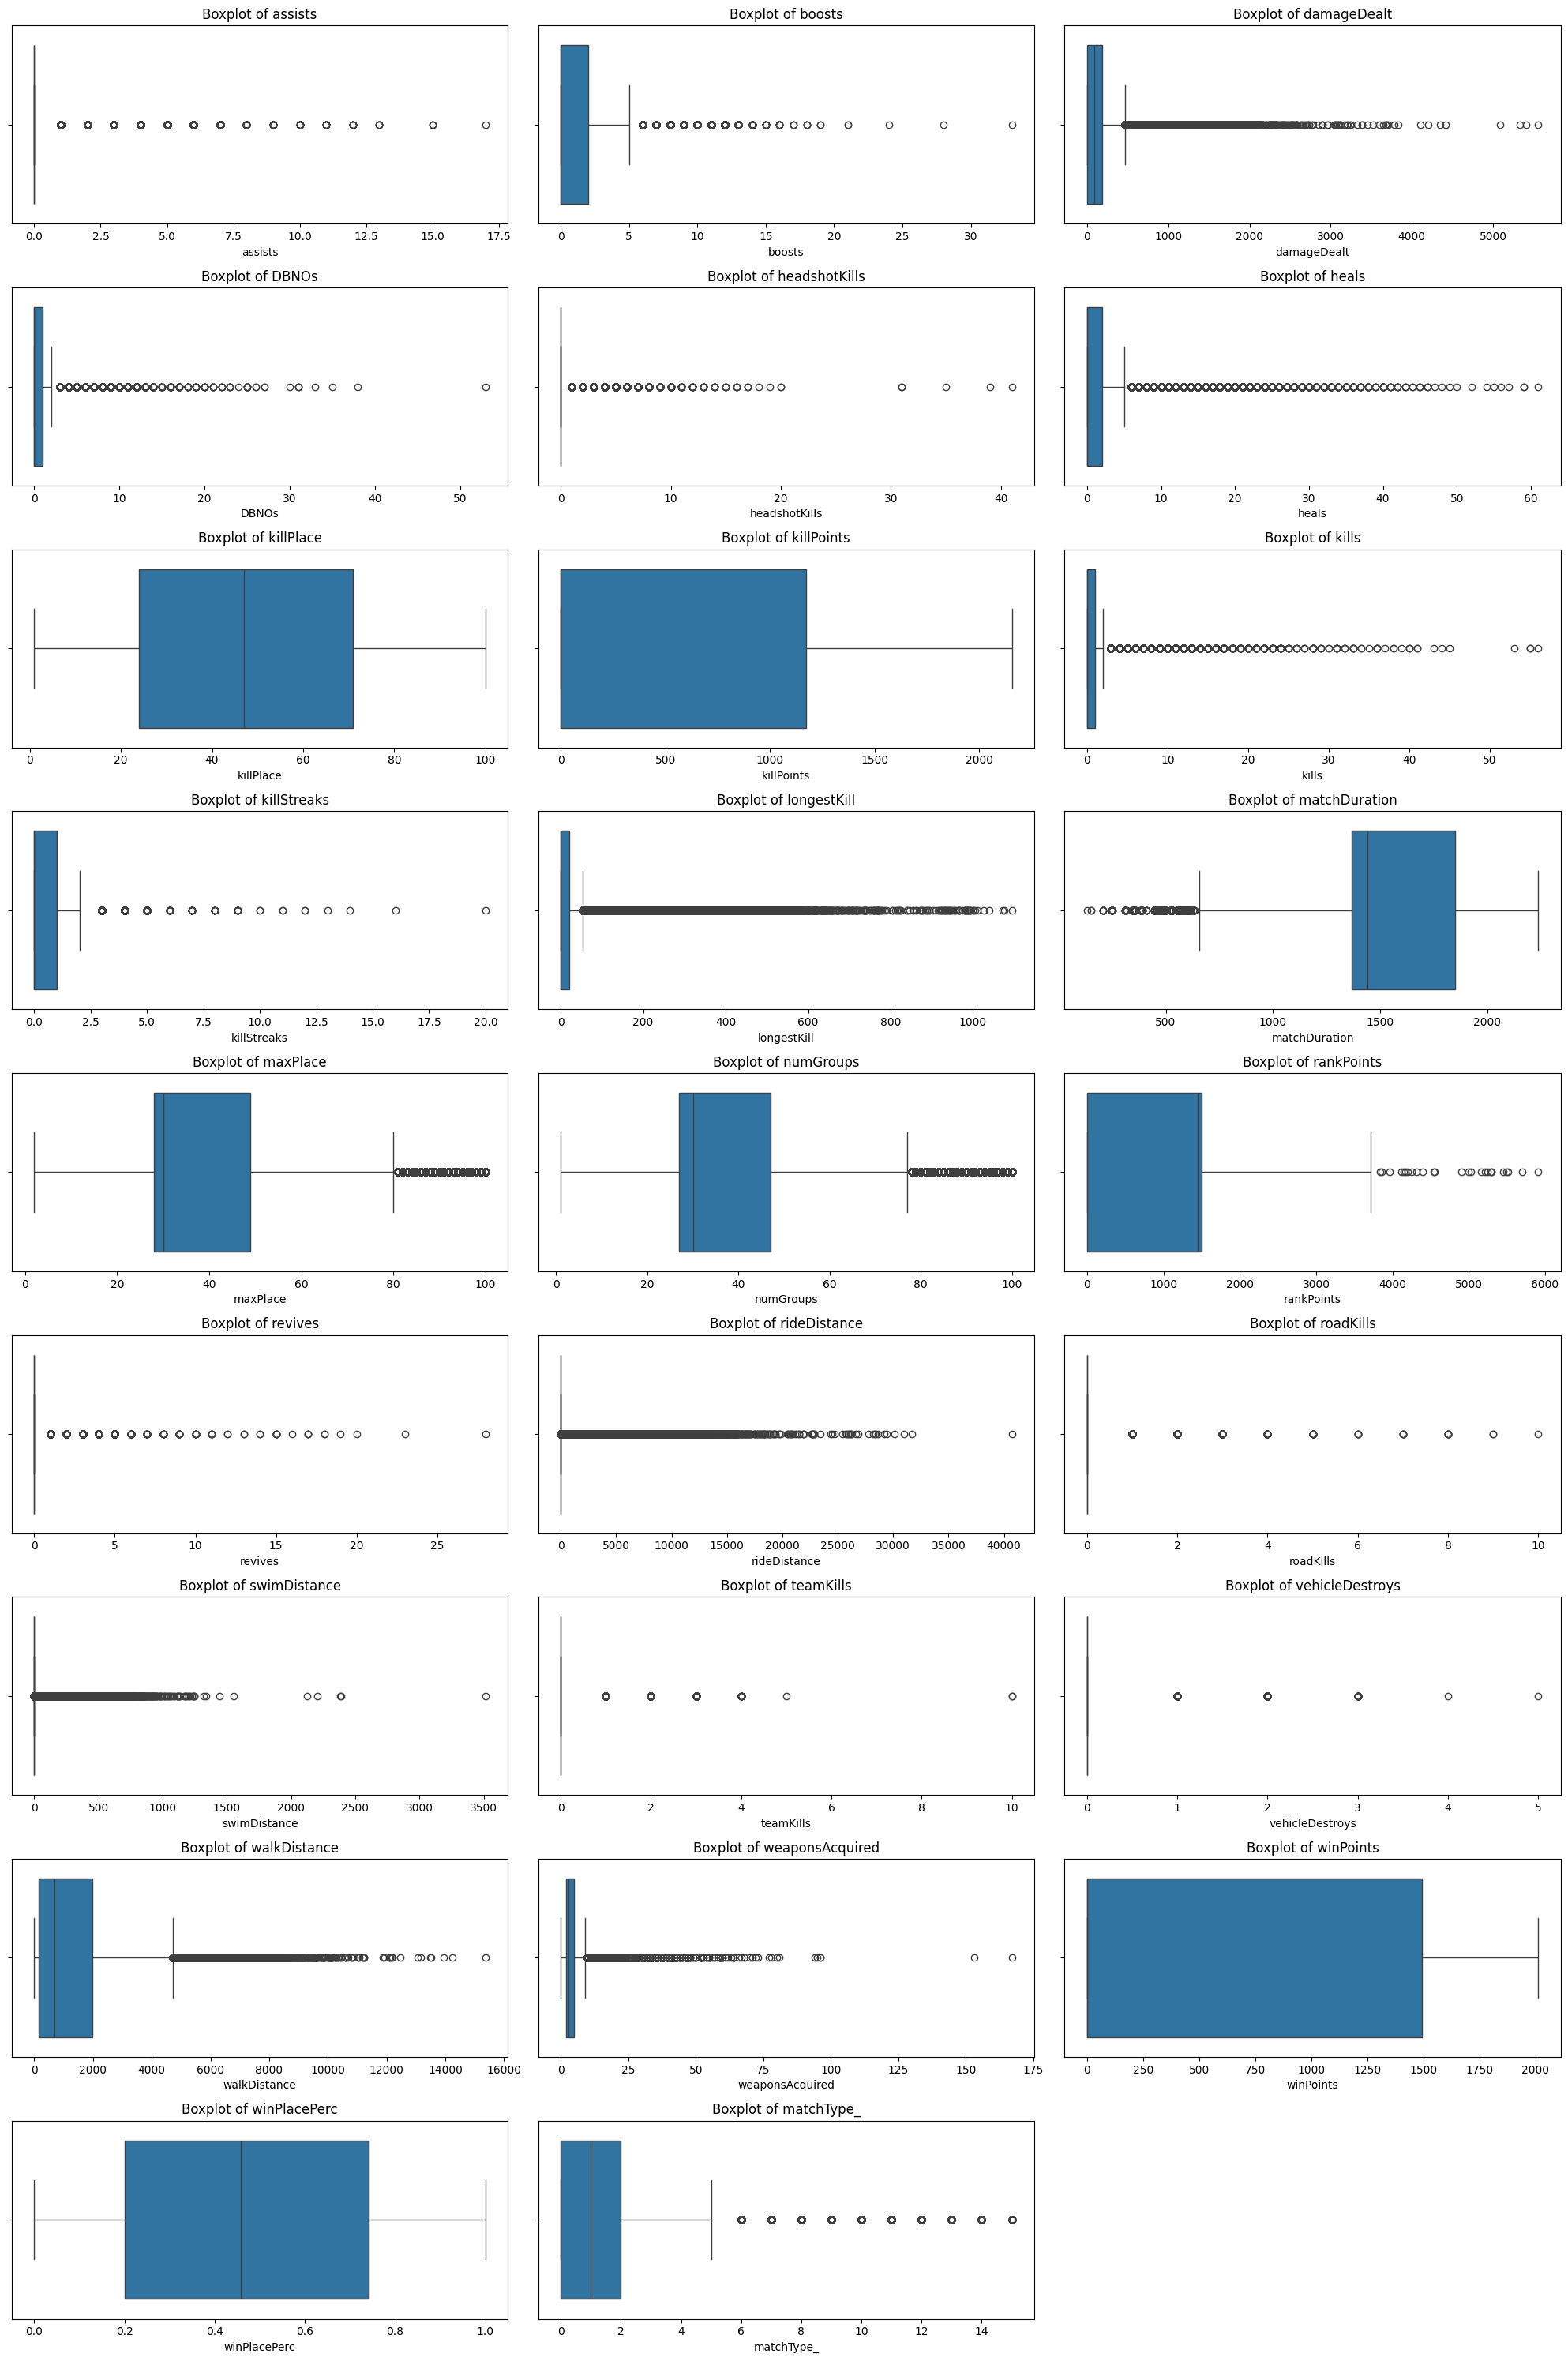

In [29]:
# List of the columns for which you want to create boxplots
columns = ['assists', 'boosts', 'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace', 'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration', 'maxPlace', 'numGroups', 'rankPoints', 'revives', 'rideDistance', 'roadKills', 'swimDistance', 'teamKills', 'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints', 'winPlacePerc', 'matchType_']

# Set up the figure for multiple subplots
plt.figure(figsize=(20, 30))  # Adjust the size to fit all plots nicely

# Loop over each column to create a separate box plot
for i, column in enumerate(columns, 1):
    plt.subplot(9, 3, i)  # 7 rows, 3 columns of subplots
    sns.boxplot(x=column, data=pandas_updated)
    plt.title(f'Boxplot of {column}')

# Adjust the layout to prevent overlap
plt.tight_layout()
plt.show()

In [30]:
from pyspark.sql import functions as F

def winsorize_inplace(df, col_name, lower_percentile=0.05, upper_percentile=0.95):

    lower_bound = df.approxQuantile(col_name, [lower_percentile], 0.01)[0]
    upper_bound = df.approxQuantile(col_name, [upper_percentile], 0.01)[0]

    winsorized_df = df.withColumn(
        col_name,
        F.when(F.col(col_name) < lower_bound, lower_bound)
        .when(F.col(col_name) > upper_bound, upper_bound)
        .otherwise(F.col(col_name))
    )

    return winsorized_df

In [31]:
# Winsorize the 'assists' column at the 5th and 95th percentiles
df = winsorize_inplace(df, "assists")

df.show()

+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|assists|boosts|damageDealt|DBNOs|headshotKills|heals|killPlace|killPoints|kills|killStreaks|longestKill|matchDuration|maxPlace|numGroups|rankPoints|revives|rideDistance|roadKills|swimDistance|teamKills|vehicleDestroys|walkDistance|weaponsAcquired|winPoints|winPlacePerc|matchType_|
+-------+------+-----------+-----+-------------+-----+---------+----------+-----+-----------+-----------+-------------+--------+---------+----------+-------+------------+---------+------------+---------+---------------+------------+---------------+---------+------------+----------+
|    0.0|     0|        0.0|    0|            0|    0|       60|      1241|    0|          0|        0.0|         1306|      28|       26|        -1|  

<Axes: xlabel='assists'>

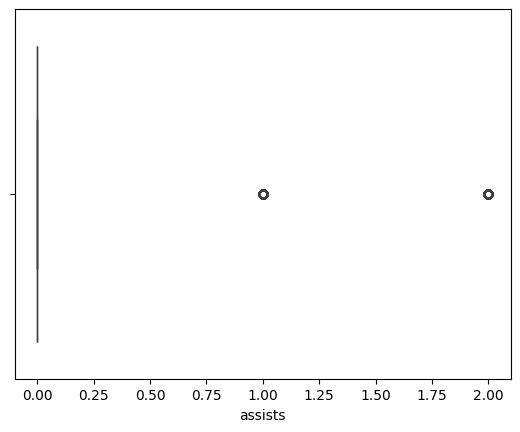

In [35]:
assists_df = df.select('assists').toPandas()
sns.boxplot(x='assists', data=assists_df)

In [37]:
def handle_outliers_iqr(df, col_name):

    # Calculate quartiles and IQR
    quartiles = df.approxQuantile(col_name, [0.25, 0.75], 0.01)
    q1 = quartiles[0]
    q3 = quartiles[1]
    iqr = q3 - q1

    # Define outlier bounds
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Calculate the median
    median = df.approxQuantile(col_name, [0.5], 0.01)[0]

    # Impute outliers with the median
    df_imputed = df.withColumn(
        col_name,
        F.when(
            (F.col(col_name) < lower_bound) | (F.col(col_name) > upper_bound),
            F.lit(median)
        ).otherwise(F.col(col_name))
    )

    return df_imputed

In [38]:
df = handle_outliers_iqr(df, "boosts")

<Axes: xlabel='boosts'>

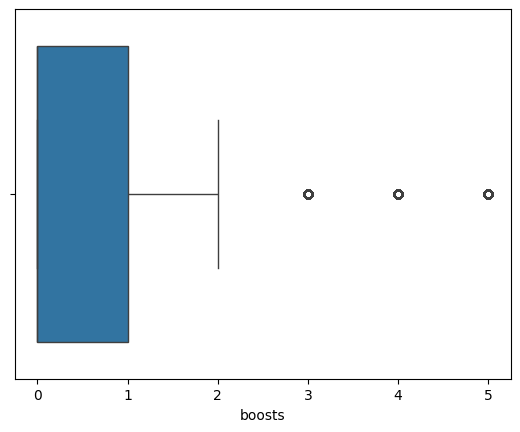

In [39]:
boosts_df = df.select('boosts').toPandas()
sns.boxplot(x='boosts', data=boosts_df)

<Axes: xlabel='damageDealt'>

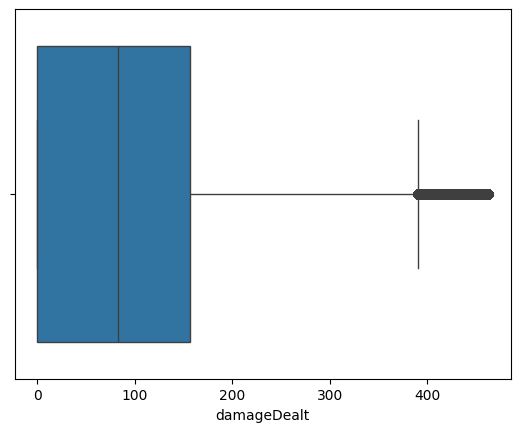

In [41]:
df = handle_outliers_iqr(df, "damageDealt")
damageDealt_df = df.select('damageDealt').toPandas()
sns.boxplot(x='damageDealt', data=damageDealt_df)

<Axes: xlabel='kills'>

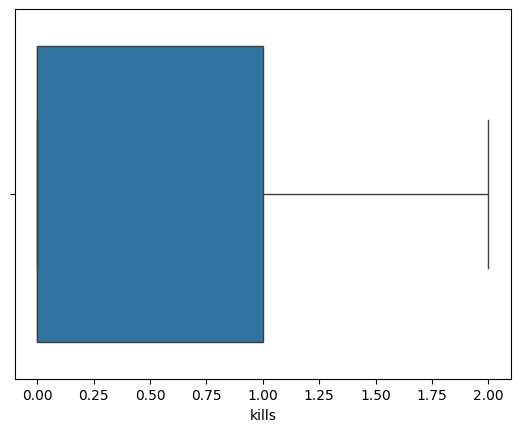

In [42]:
df = handle_outliers_iqr(df, "kills")
kills_df = df.select('kills').toPandas()
sns.boxplot(x='kills', data=kills_df)

<Axes: xlabel='DBNOs'>

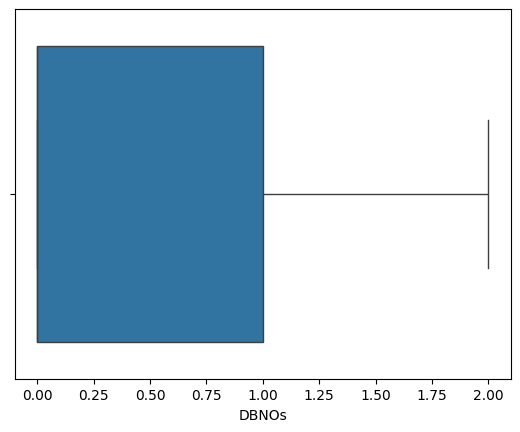

In [43]:
df = handle_outliers_iqr(df, "DBNOs")
DBNOs_df = df.select('DBNOs').toPandas()
sns.boxplot(x='DBNOs', data=DBNOs_df)

<Axes: xlabel='heals'>

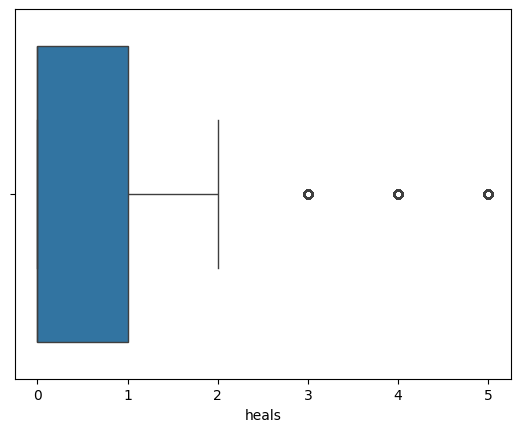

In [50]:
df = handle_outliers_iqr(df, 'heals')
heals_df = df.select('heals').toPandas()
sns.boxplot(x='heals',data=heals_df)

<Axes: xlabel='killStreaks'>

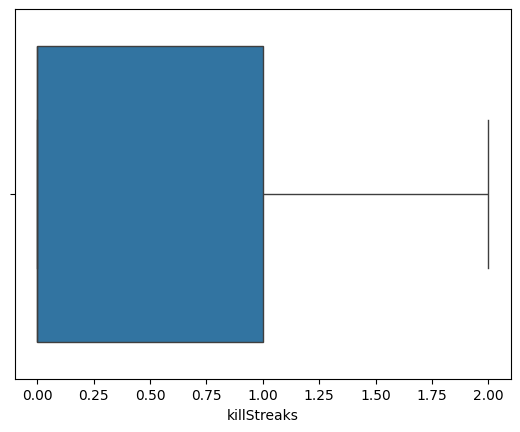

In [51]:
df = handle_outliers_iqr(df, "killStreaks")
killStreaks_df = df.select('killStreaks').toPandas()
sns.boxplot(x='killStreaks', data=killStreaks_df)

<Axes: xlabel='longestKill'>

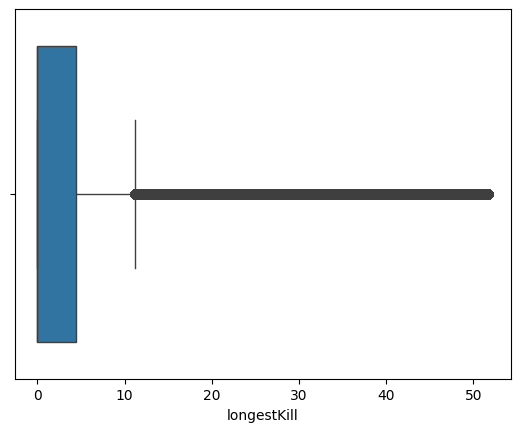

In [52]:
df = handle_outliers_iqr(df, "longestKill")
longestKill_df = df.select('longestKill').toPandas()
sns.boxplot(x='longestKill', data=longestKill_df)

<Axes: xlabel='matchDuration'>

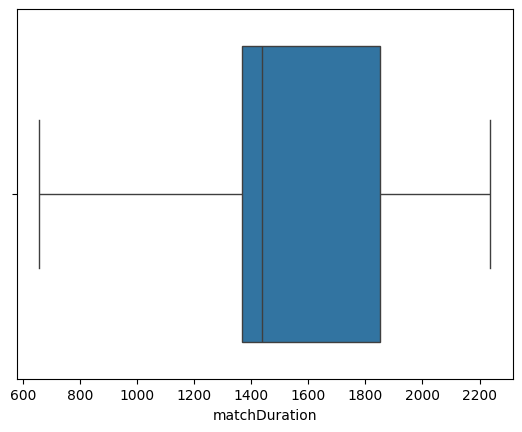

In [53]:
df = handle_outliers_iqr(df, "matchDuration")
matchDuration_df = df.select('matchDuration').toPandas()
sns.boxplot(x='matchDuration', data=matchDuration_df)

<Axes: xlabel='maxPlace'>

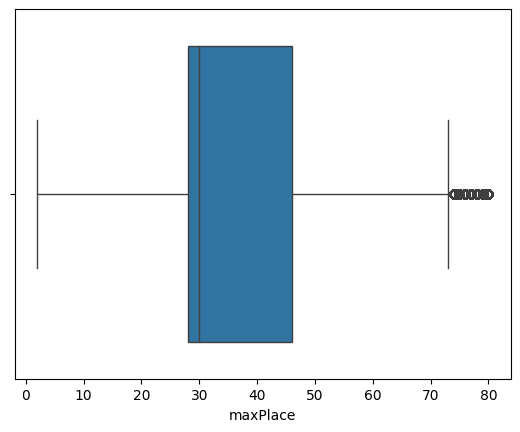

In [54]:
df = handle_outliers_iqr(df, "maxPlace")
maxPlace_df = df.select('maxPlace').toPandas()
sns.boxplot(x='maxPlace', data=maxPlace_df)

<Axes: xlabel='numGroups'>

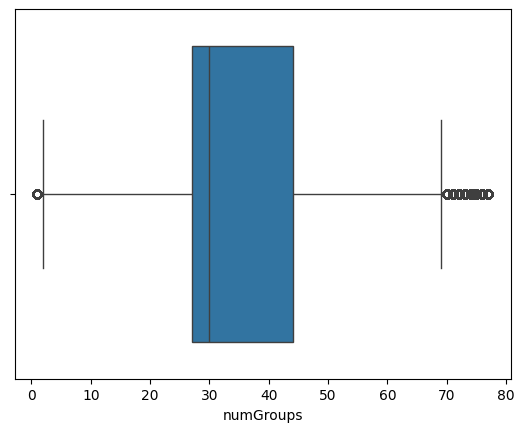

In [55]:
df = handle_outliers_iqr(df, "numGroups")
numGroups_df = df.select('numGroups').toPandas()
sns.boxplot(x='numGroups', data=numGroups_df)

<Axes: xlabel='rankPoints'>

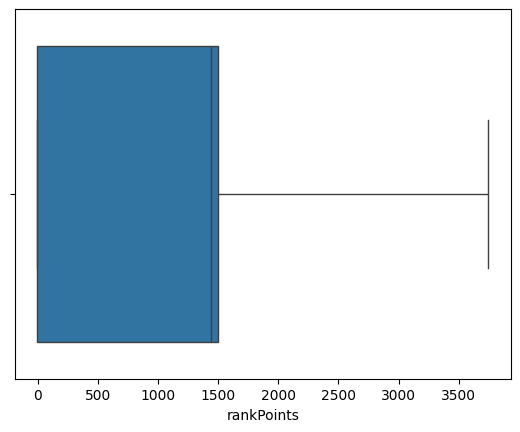

In [56]:
df = handle_outliers_iqr(df, "rankPoints")
rankPoints_df = df.select('rankPoints').toPandas()
sns.boxplot(x='rankPoints', data=rankPoints_df)

<Axes: xlabel='rideDistance'>

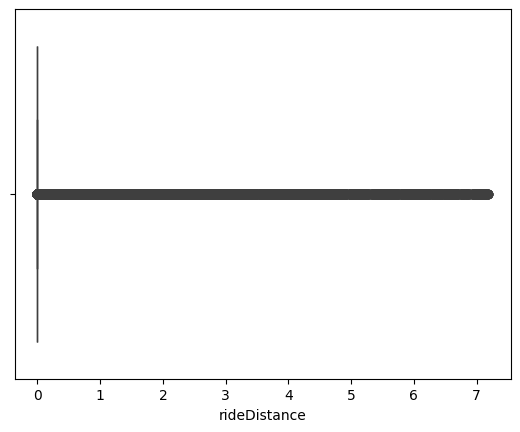

In [57]:
df = handle_outliers_iqr(df, "rideDistance")
rideDistance_df = df.select('rideDistance').toPandas()
sns.boxplot(x='rideDistance', data=rideDistance_df)

<Axes: xlabel='swimDistance'>

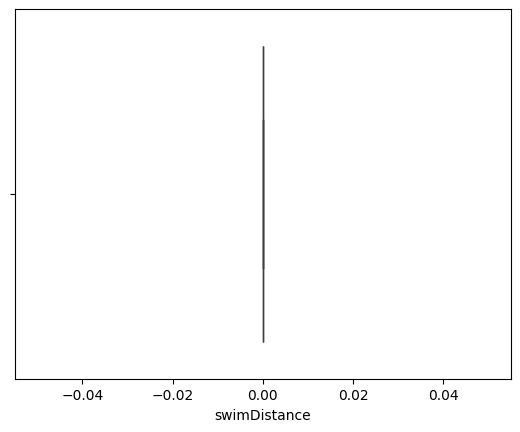

In [58]:
df = handle_outliers_iqr(df, "swimDistance")
swimDistance_df = df.select('swimDistance').toPandas()
sns.boxplot(x='swimDistance', data=swimDistance_df)

<Axes: xlabel='walkDistance'>

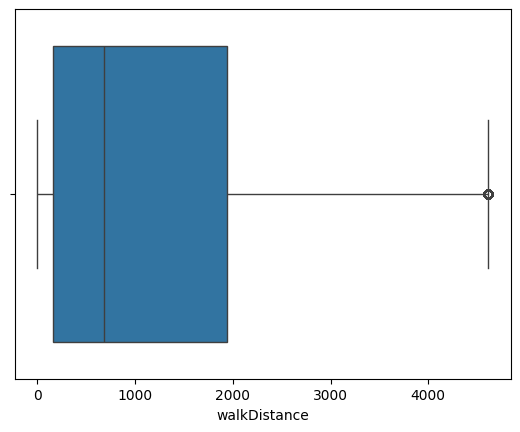

In [59]:
df = handle_outliers_iqr(df, "walkDistance")
walkDistance_df = df.select('walkDistance').toPandas()
sns.boxplot(x='walkDistance', data=walkDistance_df)

<Axes: xlabel='weaponsAcquired'>

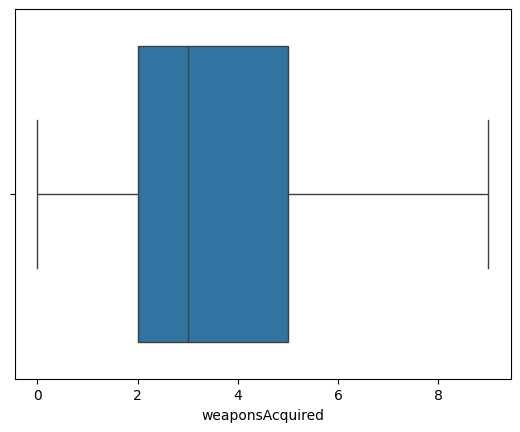

In [60]:
df = handle_outliers_iqr(df, "weaponsAcquired")
weaponsAcquired_df = df.select('weaponsAcquired').toPandas()
sns.boxplot(x='weaponsAcquired', data=weaponsAcquired_df)

<Axes: xlabel='matchType_'>

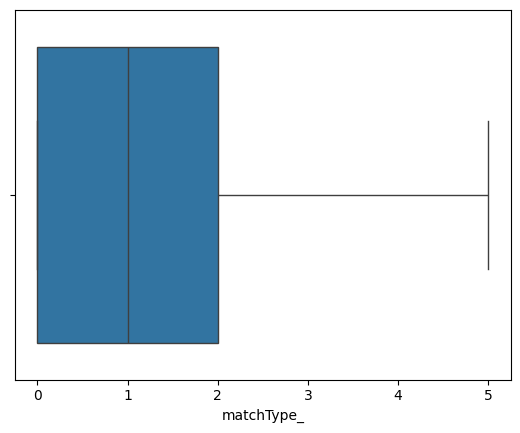

In [61]:
df = handle_outliers_iqr(df, "matchType_")
matchType__df = df.select('matchType_').toPandas()
sns.boxplot(x='matchType_', data=matchType__df)

In [62]:
spark.stop()